<a href="https://colab.research.google.com/github/chengzhiz/chengzhiz/blob/main/critical_diameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
g = 9.81  # m/s²
rho_air = 1.225  # kg/m³ (air density)
rho_he = 0.1786  # kg/m³ (helium density)

In [68]:
def calculate_net_force(D, hole_d, A, G):
    """Calculate net buoyancy force for a sphere with hole"""
    r = D/2
    hole_r = hole_d/2

    # Surface areas (convert g to kg)
    sphere_area   = np.pi * r ** 2
    hole_area     = np.pi * hole_r ** 2
    hole_wall     = 2 * np.pi * hole_r * D  # Cylindrical hole wall
    total_area    = (sphere_area - hole_area) + hole_wall
    material_mass = total_area * A / 1000  # Convert g to kg

    # Volumes
    sphere_vol = (4/3) * np.pi * r**3
    hole_vol = np.pi * hole_r**2 * D  # Cylindrical approximation
    he_vol = sphere_vol - hole_vol

    # Forces
    buoyancy = rho_air * he_vol * g
    weight = (material_mass + rho_he * he_vol + G) * g

    return buoyancy - weight

def find_critical_diameter(hole_d, A, G):
    """Find where net force crosses zero between hole size and 5m"""
    def equation(D):
        return calculate_net_force(D, hole_d, A, G)

    # Try to find solution between hole size and 5m
    try:
        D_crit = fsolve(equation, x0=0.2)[0]  # Start with max(hole size, 1m)
        if equation(D_crit) > -0.1:  # Small tolerance
          return D_crit
    except:
        pass
    return None

In [75]:
# USER INPUTS (change these)
hole_diameter = 0.15  # meters
A = 120  # material density (g/m²) - try 30-50 for realistic balloons
G = 0.5  # extra weight (kg)

/tmp/ipython-input-68-4271872595.py:31: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  D_crit = fsolve(equation, x0=0.2)[0]  # Start with max(hole size, 1m)


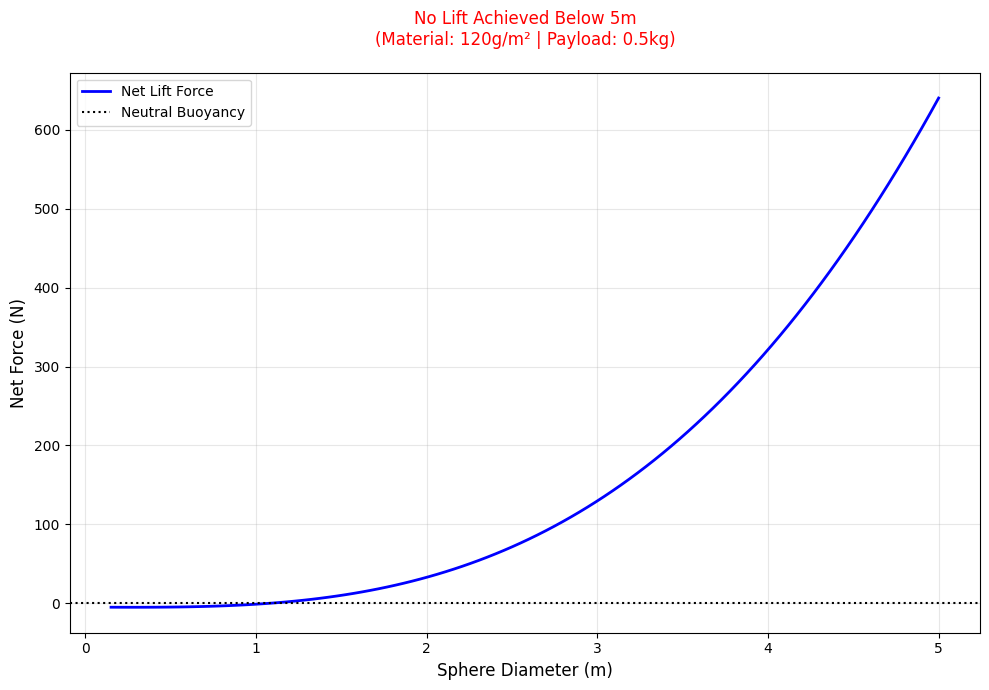


=== No Solution Found ===
Recommendations:
1. Reduce material density (current: 120 g/m²)
2. Reduce payload weight (current: 0.5 kg)
3. Decrease hole size (current: 0.15 m)


In [76]:
# Calculate critical diameter
critical_d = find_critical_diameter(hole_diameter, A, G)

# Generate plot data
diameters = np.linspace(hole_diameter, 5, 100)  # From hole size to 5m, 100 points
net_forces = [calculate_net_force(d, hole_diameter, A, G) for d in diameters]

# Create the plot
plt.figure(figsize=(10, 7))
plt.plot(diameters, net_forces, 'b-', linewidth=2, label='Net Lift Force')
plt.axhline(0, color='k', linestyle=':', label='Neutral Buoyancy')

# Highlight critical point if found
if critical_d is not None: # and critical_d <= 5
    plt.axvline(critical_d, color='r', linestyle='--',
               label=f'Critical Diameter ({critical_d:.2f}m)')
    plt.scatter(critical_d, 0, color='r', s=100)

    # Calculate volumes
    sphere_vol = (4/3)*np.pi*(critical_d/2)**3
    he_vol = sphere_vol - np.pi* (hole_diameter/2)**2 * critical_d

    plt.title(f'Lift Achieved at {critical_d:.2f}m\n'
              f'Helium Volume: {he_vol:.1f}m³ | Material: {A}g/m² | Payload: {G}kg',
              pad=20)
else:
    plt.title(f"No Lift Achieved Below 5m\n(Material: {A}g/m² | Payload: {G}kg)",
              pad=20, color='r')

# Formatting
plt.xlabel('Sphere Diameter (m)', fontsize=12)
plt.ylabel('Net Force (N)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed results
if critical_d is not None and critical_d <= 5:
    print("\n=== Floating Sphere Solution ===")
    print(f"Critical Diameter: {critical_d:.2f} m")
    print(f"Material Density: {A} g/m²")
    print(f"Payload Capacity: {G} kg")
    print(f"Total Sphere Volume: {(4/3)*np.pi*(critical_d/2)**3:.1f} m³")
    print(f"Usable Helium Volume: {he_vol:.1f} m³")
    print(f"Helium Weight: {rho_he * he_vol:.2f} kg")
else:
    print("\n=== No Solution Found ===")
    print("Recommendations:")
    print(f"1. Reduce material density (current: {A} g/m²)")
    print(f"2. Reduce payload weight (current: {G} kg)")
    print(f"3. Decrease hole size (current: {hole_diameter} m)")